In [ ]:
!pip install --upgrade datasets
!pip install --upgrade huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingfa

In [ ]:
#!/usr/bin/env python3
# Download the 56 zip files in Images_png in batches
import urllib.request
from tqdm import tqdm

# URLs for the zip files
links = [
      'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
    'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
    'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
	'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
    'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
	'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
	#'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
   # 'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
	#'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
	#'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
	#'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
	#'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz',
]

for idx, link in tqdm(enumerate(links), total=len(links), desc="Processing batches"):
    fn = 'images_%02d.tar.gz' % (idx+1)
    print('downloading'+fn+'...')
    urllib.request.urlretrieve(link, fn)  # download the zip file
    !mkdir /content/{'images_%02d' % (idx+1)}
    !tar -xzf /content/{fn} -C /content/{'images_%02d' % (idx+1)} # unzip it
    !rm -r /content/{fn}

print("Download complete. Please check the checksums")

Processing batches:   0%|          | 0/6 [00:00<?, ?it/s]

downloadingimages_01.tar.gz...


Processing batches:  17%|█▋        | 1/6 [00:48<04:00, 48.04s/it]

downloadingimages_02.tar.gz...


Processing batches:  33%|███▎      | 2/6 [02:30<05:20, 80.25s/it]

downloadingimages_03.tar.gz...


Processing batches:  50%|█████     | 3/6 [04:22<04:44, 94.80s/it]

downloadingimages_04.tar.gz...


Processing batches:  67%|██████▋   | 4/6 [06:17<03:25, 102.55s/it]

downloadingimages_05.tar.gz...


Processing batches:  83%|████████▎ | 5/6 [08:05<01:44, 104.66s/it]

downloadingimages_06.tar.gz...


Processing batches: 100%|██████████| 6/6 [09:55<00:00, 99.17s/it] 

Download complete. Please check the checksums


In [ ]:
import os
import shutil
from tqdm import tqdm

# List of your folders
folders = [
    '/content/images_01/images',
    '/content/images_02/images',
    '/content/images_03/images',
    '/content/images_04/images',
    '/content/images_05/images',
    '/content/images_06/images',
    #'/content/images_07/images',
    #'/content/images_08/images',
    #'/content/images_09/images',
    #'/content/images_10/images',
    #'/content/images_11/images',
    #'/content/images_12/images',
]

# Combined folder path
combined_folder = '/content/combined_folder'

# Create combined folder if it doesn't exist
os.makedirs(combined_folder, exist_ok=True)

# Loop through each folder and move images to the combined folder
for folder in folders:
    for filename in os.listdir(folder):
        # Check if the file is an image (adjust the extension list as needed)
        if filename.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')):
            source_path = os.path.join(folder, filename)
            destination_path = os.path.join(combined_folder, filename)
            shutil.move(source_path, destination_path)

print("All images have been moved.")

All images have been moved.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os

data = pd.read_csv('/content/drive/MyDrive/Data_Entry_2017_v2020.csv')

In [ ]:
data['Finding Labels'] = data['Finding Labels'].replace('No Finding', 'No_Finding')

In [ ]:
# Converts the format of each label in the dataframe from "LabelA|LabelB|LabelC"
# into ["LabelA", "LabelB", "LabelC"], concatenates the
# lists together and removes duplicate labels
unique_labels = np.unique(
    data['Finding Labels'].str.split("|").aggregate(np.concatenate)
).tolist()

print(f"Dataset contains the following labels:\n{unique_labels}")

Dataset contains the following labels:
['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No_Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [ ]:
temp = []

!mkdir /content/final_dataset

folder_path = "/content/combined_folder"

file_path = os.path.join(folder_path, filename)

for label in unique_labels:
    filt = (data['Finding Label'] == label)
    temp.append(data.loc[filt, 'Image Index'])

for i in range(len(temp)):
  !mkdir /content/final_dataset/{unique_labels[i]}
  for j in temp[i]:
    file_path = os.path.join(folder_path, j)
    if os.path.isfile(file_path):
      !cp -rp /content/combined_folder/{j} /content/final_dataset/{unique_labels[i]}
    else:
      print(f"{j} not found")

Streaming output truncated to the last 5000 lines.
00029504_001.png not found
00029504_002.png not found
00029504_005.png not found
00029505_000.png not found
00029506_000.png not found
00029508_000.png not found
00029512_000.png not found
00029512_001.png not found
00029513_000.png not found
00029513_001.png not found
00029513_002.png not found
00029513_003.png not found
00029513_004.png not found
00029513_005.png not found
00029513_006.png not found
00029514_001.png not found
00029514_002.png not found
00029514_005.png not found
00029514_006.png not found
00029514_009.png not found
00029515_000.png not found
00029516_000.png not found
00029517_000.png not found
00029518_000.png not found
00029519_000.png not found
00029520_001.png not found
00029521_000.png not found
00029521_001.png not found
00029522_001.png not found
00029526_001.png not found
00029526_004.png not found
00029526_005.png not found
00029526_006.png not found
00029526_007.png not found
00029527_000.png not found
0002

Random photo selected: 00000912_001.png
Random photo selected: 00012276_018.png
Random photo selected: 00013111_032.png
Random photo selected: 00013641_012.png
Random photo selected: 00004833_003.png
Random photo selected: 00003523_037.png
Random photo selected: 00001238_000.png
Random photo selected: 00000634_000.png
Random photo selected: 00000652_013.png
Random photo selected: 00002702_000.png
Random photo selected: 00010156_000.png
Random photo selected: 00001034_002.png
Random photo selected: 00011271_000.png
Random photo selected: 00007191_001.png
Random photo selected: 00003062_004.png
['/content/final_dataset/Atelectasis/00000912_001.png', '/content/final_dataset/Cardiomegaly/00012276_018.png', '/content/final_dataset/Consolidation/00013111_032.png', '/content/final_dataset/Edema/00013641_012.png', '/content/final_dataset/Effusion/00004833_003.png', '/content/final_dataset/Emphysema/00003523_037.png', '/content/final_dataset/Fibrosis/00001238_000.png', '/content/final_dataset/H

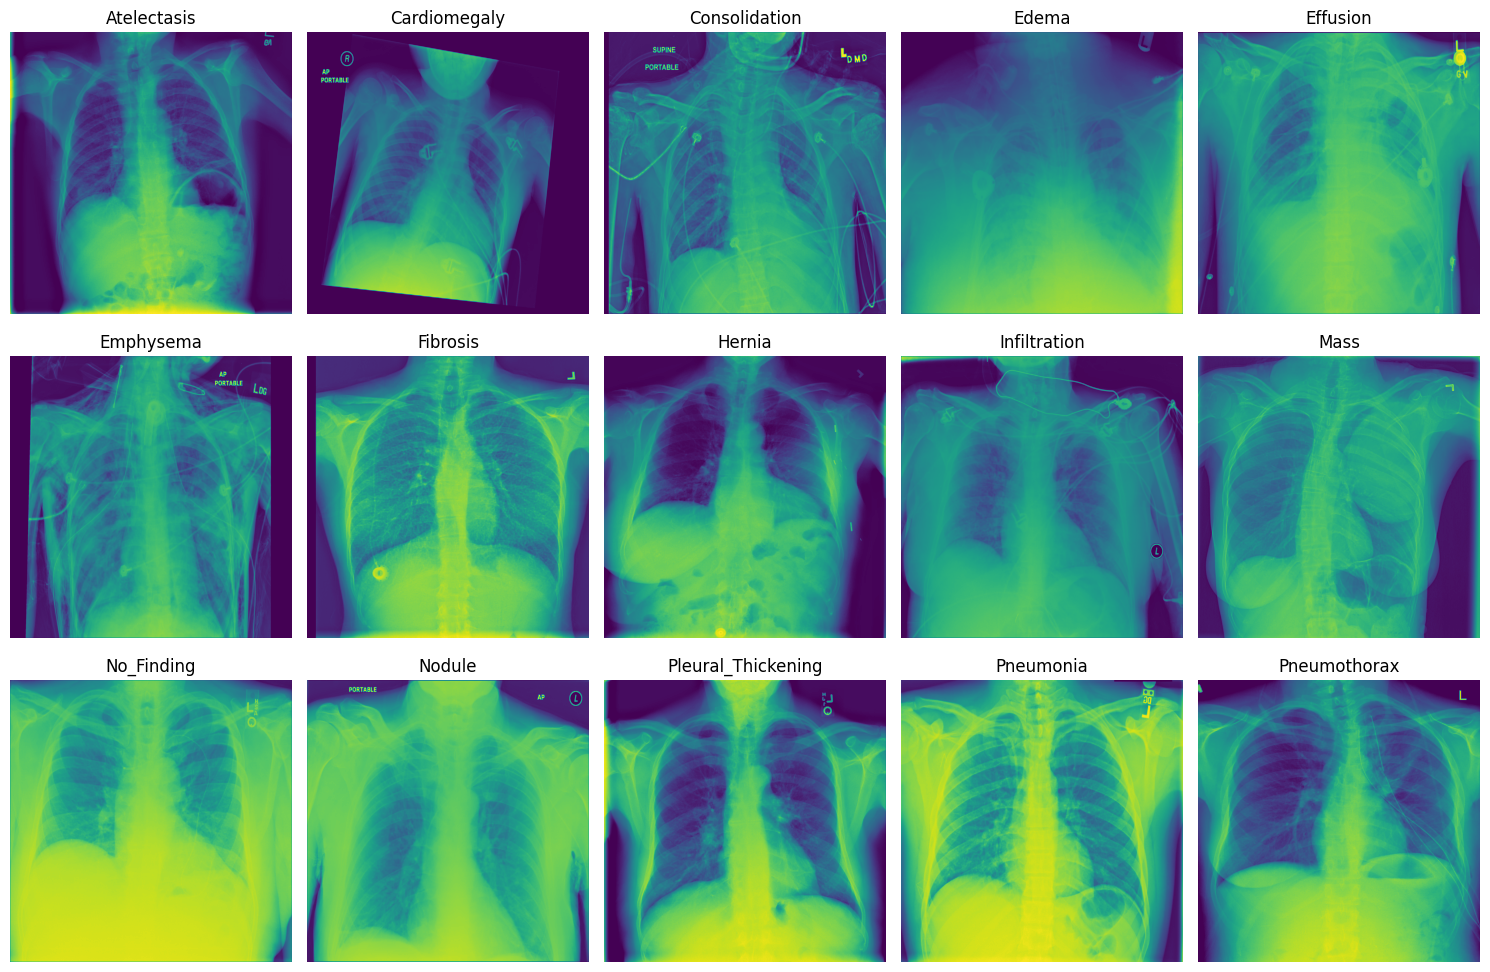

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

unique_labels = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No_Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']

def pick_random_photo(folder_path):
    # Get a list of all files in the folder
    files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]

    # Filter to include only image files (optional)
    image_files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]

    # Pick a random image file
    if image_files:
        random_photo = random.choice(image_files)
        print(f"Random photo selected: {random_photo}")
        return os.path.join(folder_path, random_photo)
    else:
        print("No images found in the folder.")
        return None


random_photo_path = []

for i in unique_labels:
  random_photo_path.append(pick_random_photo(f'/content/final_dataset/{i}'))

print(random_photo_path)

#temp = ['/content/final_dataset/Atelectasis/00006973_009.png', '/content/final_dataset/Cardiomegaly/00010897_016.png', '/content/final_dataset/Consolidation/00005400_003.png', '/content/final_dataset/Edema/00012364_077.png', '/content/final_dataset/Effusion/00007138_010.png', '/content/final_dataset/Emphysema/00002041_000.png', '/content/final_dataset/Fibrosis/00013267_000.png', '/content/final_dataset/Hernia/00013278_001.png', '/content/final_dataset/Infiltration/00005712_007.png', '/content/final_dataset/Mass/00002361_002.png', '/content/final_dataset/No_Finding/00001567_001.png', '/content/final_dataset/Nodule/00005218_028.png', '/content/final_dataset/Pleural_Thickening/00003520_000.png', '/content/final_dataset/Pneumonia/00007191_001.png', '/content/final_dataset/Pneumothorax/00008464_001.png']


# Plotting the images
fig, axes = plt.subplots(3, 5, figsize=(15, 10))  # 3 rows x 5 columns to fit 15 images
axes = axes.flatten()

for i in range(len(unique_labels)):
    ax = axes[i]
    image_path = random_photo_path[i]
    if image_path:
        image = Image.open(image_path)
        ax.imshow(np.array(image))  # Display the image with 'viridis' colormap
        ax.set_title(unique_labels[i])
        ax.axis('off')  # Remove axes for cleaner display
    else:
        ax.set_title(unique_labels[i])
        ax.axis('off')  # If no image is found, just display the title

# Hide any unused subplots
for j in range(len(unique_labels), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

[2098, 656, 662, 285, 1961, 468, 503, 70, 3823, 983, 31161, 1325, 598, 154, 1030]


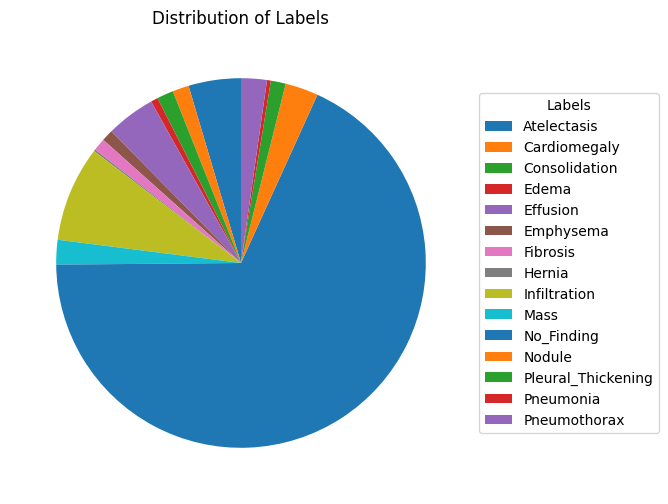

In [ ]:
unique_labels = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No_Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']

def get_list_of_all_files(folder_path):
    # Get a list of all files in the folder
    files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]
    temp = (len(files))
    return temp

temp = []

for i in unique_labels:
  temp.append(get_list_of_all_files(f'/content/final_dataset/{i}'))

print(temp)

total = sum(temp)

for i in range(len(temp)):
  temp[i] = (temp[i]/total)*100

plt.figure(figsize=(8, 6))  # Optional: set the figure size
plt.pie(temp, startangle=90)
plt.legend(unique_labels, title="Labels", loc="center left", bbox_to_anchor=(1, 0.5))  # loc="best" places it in an optimal spot
plt.title("Distribution of Labels")
plt.show()

In [ ]:
label_index = {v: i for i, v in enumerate(unique_labels)}


def string_to_N_hot(string: str):
    true_index = [label_index[cl] for cl in string.split("|")]
    label = np.zeros((len(unique_labels),), dtype=float)
    label[true_index] = 1
    return label

data["labels"] = data["Finding Labels"].apply(string_to_N_hot)

In [ ]:
images_dir = '/content/combined_folder'

output_file_path = os.path.join(images_dir, 'metadata.jsonl')

data[["Image Index", "labels"]].rename(columns={"Image Index": "file_name"}).to_json(output_file_path, orient='records', lines=True)

In [ ]:
from huggingface_hub import notebook_login
from datasets import load_dataset
notebook_login()

In [ ]:
import datasets

dataset = datasets.load_dataset("imagefolder", data_dir="/content/combined_folder")

Resolving data files:   0%|          | 0/112121 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
split = dataset['train'].train_test_split(test_size=0.2)
dataset["train"] = split["train"]
dataset["validation"] = split["test"]

In [ ]:
dataset.push_to_hub("Tsomaros/Chest_Xray_N_Hot3")